In [1]:
import os
import copy
import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd
import uproot3
import mplhep as hep

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-o0yq3129 because the default path (/home/cms-jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def printColorText(text, color): # both the input text and the color desired are input as strings
    whichcolor = {
                    'red':'\033[91m' + text,
                    'yellow':'\033[93m' + text,
                    'green':'\033[92m' + text,
                    'blue':'\033[96m' + text,
                    'indigo':'\033[94m' + text,
                    'violet':'\033[95m' + text,
                }
    print(whichcolor.get(color) + '\033[90m')
    # The added string on the end resets the default colored text to black #

# ---- Test the function ---- #
print('this sentence is black by default')
printColorText('this sentence should be violet', 'violet')
print('this sentence is defaulted to black after printColorText')

this sentence is black by default
this sentence should be violet
this sentence is defaulted to black after printColorText


In [3]:
dir1 = 'CoffeaOutputsForCombine/Coffea_FirstRun/'
dir2 = 'CoffeaOutputsForCombine/Coffea_SecondRun/'
btagDir = 'MediumBTag/'#'LooseBTag/'
yearDir = '2016/'
APVDir = 'noAPV/'
od = ''
if btagDir == '':
    od = '_oldANdisc'
vfp = 'postVFP'
if APVDir == 'APV/':
    vfp = 'preVFP'
MR = ''#'_MistagOnly'
Era = ''

In [4]:
JetHT2016_unwgt_str = 'TTbarRes_0l_UL16'+vfp+'_JetHT'+Era+'_Data'
TTbar_unwgt_str = 'TTbarRes_0l_UL16'+vfp+'_TTbar'
# RSGluon1000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon1000'
# RSGluon1500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon1500'
# RSGluon2000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon2000'
# RSGluon2500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon2500'
# RSGluon3000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon3000'
# RSGluon3500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon3500'
# RSGluon4000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon4000'
# RSGluon4500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon4500'
# RSGluon5000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon5000'
# DM1000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM1000'
# DM1500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM1500'
# DM2000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM2000'
# DM2500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM2500'
# DM3000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM3000'
# DM3500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM3500'
# DM4000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM4000'
# DM4500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM4500'
# DM5000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM5000'

# Systematic Correction / Uncertainty + Reweighting Label
## Set the strings accordingly
#### For bTagSyst: '_btagUnc_\<syst\>' where \<syst\> can be either $central$, $up$ or $down$
#### For Top $p_T$ Reweight: '_TopReweight'

In [5]:
Unc = '' #_btagUnc_central_method2
TopPt = '' #_TopReweight
UncDir = Unc + '/'
TopPtDir = TopPt + '/'

In [6]:
JetHT2016_wgt_str = JetHT2016_unwgt_str + '_weighted' + Unc + MR
TTbar_wgt_str = TTbar_unwgt_str + '_weighted' + Unc +  MR + TopPt
# RSGluon1000_wgt_str = RSGluon1000_unwgt_str + '_weighted' +  MR + Unc
# RSGluon1500_wgt_str = RSGluon1500_unwgt_str + '_weighted' +  MR + Unc
# RSGluon2000_wgt_str = RSGluon2000_unwgt_str + '_weighted' +  MR + Unc
# RSGluon2500_wgt_str = RSGluon2500_unwgt_str + '_weighted' +  MR + Unc
# RSGluon3000_wgt_str = RSGluon3000_unwgt_str + '_weighted' +  MR + Unc
# RSGluon3500_wgt_str = RSGluon3500_unwgt_str + '_weighted' +  MR + Unc
# RSGluon4000_wgt_str = RSGluon4000_unwgt_str + '_weighted' +  MR + Unc
# RSGluon4500_wgt_str = RSGluon4500_unwgt_str + '_weighted' +  MR + Unc
# RSGluon5000_wgt_str = RSGluon5000_unwgt_str + '_weighted' +  MR + Unc
# DM1000_wgt_str = DM1000_unwgt_str + '_weighted' +  MR + Unc
# DM1500_wgt_str = DM1500_unwgt_str + '_weighted' +  MR + Unc
# DM2000_wgt_str = DM2000_unwgt_str + '_weighted' +  MR + Unc
# DM2500_wgt_str = DM2500_unwgt_str + '_weighted' +  MR + Unc
# DM3000_wgt_str = DM3000_unwgt_str + '_weighted' +  MR + Unc
# DM3500_wgt_str = DM3500_unwgt_str + '_weighted' +  MR + Unc
# DM4000_wgt_str = DM4000_unwgt_str + '_weighted' +  MR + Unc
# DM4500_wgt_str = DM4500_unwgt_str + '_weighted' +  MR + Unc
# DM5000_wgt_str = DM5000_unwgt_str + '_weighted' +  MR + Unc

In [7]:
JetHT2016_unweighted = util.load(dir1 + 'JetHT/' + btagDir + yearDir + APVDir + JetHT2016_unwgt_str + od + '.coffea')
TTbar_unweighted = util.load(dir1 + 'TT/' + btagDir + yearDir + APVDir + TTbar_unwgt_str + od + '.coffea')
# RSGluon1000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1000_unwgt_str + od + '.coffea')
# RSGluon1500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1500_unwgt_str + od + '.coffea')
# RSGluon2000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2000_unwgt_str + od + '.coffea')
# RSGluon2500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2500_unwgt_str + od + '.coffea')
# RSGluon3000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3000_unwgt_str + od + '.coffea')
# RSGluon3500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3500_unwgt_str + od + '.coffea')
# RSGluon4000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4000_unwgt_str + od + '.coffea')
# RSGluon4500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4500_unwgt_str + od + '.coffea')
# RSGluon5000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon5000_unwgt_str + od + '.coffea')
# DM1000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1000_unwgt_str + od + '.coffea')
# DM1500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1500_unwgt_str + od + '.coffea')
# DM2000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2000_unwgt_str + od + '.coffea')
# DM2500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2500_unwgt_str + od + '.coffea')
# DM3000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3000_unwgt_str + od + '.coffea')
# DM3500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3500_unwgt_str + od + '.coffea')
# DM4000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4000_unwgt_str + od + '.coffea')
# DM4500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4500_unwgt_str + od + '.coffea')
# DM5000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM5000_unwgt_str + od + '.coffea')

JetHT2016_weighted = util.load(dir2 + 'JetHT/' + btagDir + yearDir + APVDir + JetHT2016_wgt_str + od + '.coffea')
TTbar_weighted = util.load(dir2 + 'TT/' + btagDir + yearDir + APVDir + TTbar_wgt_str + od + '.coffea')
# RSGluon1000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1000_wgt_str + od + '.coffea')
# RSGluon1500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1500_wgt_str + od + '.coffea')
# RSGluon2000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2000_wgt_str + od + '.coffea')
# RSGluon2500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2500_wgt_str + od + '.coffea')
# RSGluon3000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3000_wgt_str + od + '.coffea')
# RSGluon3500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3500_wgt_str + od + '.coffea')
# RSGluon4000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4000_wgt_str + od + '.coffea')
# RSGluon4500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4500_wgt_str + od + '.coffea')
# RSGluon5000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon5000_wgt_str + od + '.coffea')
# DM1000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1000_wgt_str + od + '.coffea')
# DM1500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1500_wgt_str + od + '.coffea')
# DM2000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2000_wgt_str + od + '.coffea')
# DM2500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2500_wgt_str + od + '.coffea')
# DM3000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3000_wgt_str + od + '.coffea')
# DM3500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3500_wgt_str + od + '.coffea')
# DM4000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4000_wgt_str + od + '.coffea')
# DM4500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4500_wgt_str + od + '.coffea')
# DM5000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM5000_wgt_str + od + '.coffea')

In [8]:
outputs_unweighted =     {'JetHT 2016': JetHT2016_unweighted,
                          'TTbar': TTbar_unweighted,
                          # 'RSGluon1000': RSGluon1000_unweighted,
                          # 'RSGluon1500': RSGluon1500_unweighted,
                          # 'RSGluon2000': RSGluon2000_unweighted,
                          # 'RSGluon2500': RSGluon2500_unweighted,
                          # 'RSGluon3000': RSGluon3000_unweighted,
                          # 'RSGluon3500': RSGluon3500_unweighted,
                          # 'RSGluon4000': RSGluon4000_unweighted,
                          # 'RSGluon4500': RSGluon4500_unweighted,
                          # 'RSGluon5000': RSGluon5000_unweighted,
                          # 'DM1000': DM1000_unweighted,
                          # 'DM1500': DM1500_unweighted,
                          # 'DM2000': DM2000_unweighted,
                          # 'DM2500': DM2500_unweighted,
                          # 'DM3000': DM3000_unweighted,
                          # 'DM3500': DM3500_unweighted,
                          # 'DM4000': DM4000_unweighted,
                          # 'DM4500': DM4500_unweighted,
                          # 'DM5000': DM5000_unweighted
                         }

outputs_weighted  =      {'JetHT 2016': JetHT2016_weighted,
                          'TTbar': TTbar_weighted,
                          # 'RSGluon1000': RSGluon1000_weighted,
                          # 'RSGluon1500': RSGluon1500_weighted,
                          # 'RSGluon2000': RSGluon2000_weighted,
                          # 'RSGluon2500': RSGluon2500_weighted,
                          # 'RSGluon3000': RSGluon3000_weighted,
                          # 'RSGluon3500': RSGluon3500_weighted,
                          # 'RSGluon4000': RSGluon4000_weighted,
                          # 'RSGluon4500': RSGluon4500_weighted,
                          # 'RSGluon5000': RSGluon5000_weighted,
                          # 'DM1000': DM1000_weighted,
                          # 'DM1500': DM1500_weighted,
                          # 'DM2000': DM2000_weighted,
                          # 'DM2500': DM2500_weighted,
                          # 'DM3000': DM3000_weighted,
                          # 'DM3500': DM3500_weighted,
                          # 'DM4000': DM4000_weighted,
                          # 'DM4500': DM4500_weighted,
                          # 'DM5000': DM5000_weighted
                         }

# Cutflow

In [9]:
for name,output in outputs_unweighted.items(): 
    print("-------Unweighted " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Unweighted JetHT 2016--------
          all events :    251352549
                sumw :    251352549
               sumw2 :    251352549
      Passed Trigger :     50689987
       Passed HT Cut :     36860165
 Passed Loose Jet ID :     36279415
     Passed pT,y Cut :     30416567
         >= oneTTbar :     18306278
     Passed dPhi Cut :      9136090
        Good Subjets :      8917376
          AT&Pt0bcen :        13734
          AT&Pt0bfwd :        12887
          AT&Pt1bcen :        10910
          AT&Pt1bfwd :        11020
          AT&Pt2bcen :         2742
          AT&Pt2bfwd :         2648
             at0bcen :       372587
             at0bfwd :       373000
             at1bcen :       244995
             at1bfwd :       262966
             at2bcen :        42625
             at2bfwd :        47549
           pret0bcen :        95911
           pret0bfwd :        93496
           pret1bcen :        68993
           pret1bfwd :        72278
           pret2bcen :     

In [10]:
for name,output in outputs_weighted.items(): 
    print("-------Weighted " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Weighted JetHT 2016--------
          all events :    251352549
                sumw :    251352549
               sumw2 :    251352549
      Passed Trigger :     50689987
       Passed HT Cut :     36860165
 Passed Loose Jet ID :     36279415
     Passed pT,y Cut :     30416567
         >= oneTTbar :     18306278
     Passed dPhi Cut :      9136090
        Good Subjets :      8917376
          AT&Pt0bcen :        13734
          AT&Pt0bfwd :        12887
          AT&Pt1bcen :        10910
          AT&Pt1bfwd :        11020
          AT&Pt2bcen :         2742
          AT&Pt2bfwd :         2648
             at0bcen :       372587
             at0bfwd :       373000
             at1bcen :       244995
             at1bfwd :       262966
             at2bcen :        42625
             at2bfwd :        47549
           pret0bcen :        95911
           pret0bfwd :        93496
           pret1bcen :        68993
           pret1bfwd :        72278
           pret2bcen :       

In [11]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [12]:
def DoesDirectoryExist(mypath): #extra precaution (Probably overkill...)
    '''Checks to see if Directory exists before running mkdir_p'''
    import os.path
    from os import path
    
    if path.exists(mypath):
        pass
    else:
        mkdir_p(mypath)

In [13]:
def ConvertLabelToInt(mapping, str_label):
    for intkey, string in mapping.items():
        if str_label == string:
            return intkey

In [14]:
def plotratio(numerator, denominator, ax=None, histtype='errorbar', marker='.', markersize=5., color='k', alpha=0.1):
    NumeratorAxes = numerator.axes
    DenominatorAxes = denominator.axes
    
    # integer number of bins in this axis #
    NumeratorAxis1_BinNumber = NumeratorAxes[0].size - 3 # Subtract 3 to remove overflow
    
    DenominatorAxis1_BinNumber = DenominatorAxes[0].size - 3 
    
    if(NumeratorAxis1_BinNumber != DenominatorAxis1_BinNumber):
        raise Exception('Numerator and Denominator axes are different sizes; Cannot perform division.')
    # else:
    #     Numerator = numerator.to_hist()
    #     Denominator = denominator.to_hist()
        
    ratio = numerator / denominator.values()
    
    if histtype == 'errorbar':
        return hep.histplot(ratio, ax=ax, histtype=histtype, marker=marker, markersize=markersize, color=color)
    elif histtype == 'fill':
        return hep.histplot(ratio, ax=ax, histtype=histtype, color=color, alpha=alpha, lw=5.)
    else:
        return hep.histplot(ratio, ax=ax, histtype=histtype, color=color)

In [15]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["AT&Pt", "at", "pret", "0t", "1t", ">=1t", "2t", ">=0t"] 
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]
label_cats_dict = {i: label for i, label in enumerate(list_of_cats)}

# ---- List the Histograms Here ---- #
list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep')

In [16]:
maindirectory = os.getcwd() 
print(maindirectory)

/home/cms-jovyan/TTbarAllHadUproot


In [17]:
# stack_ttbar_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'red'}
# stack_background_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'yellow'}
# stack_error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'None', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
# line_rsg1000_opts = {'color': 'cornflowerblue'}
# line_rsg1500_opts = {'color': 'royalblue'}
# line_rsg2000_opts = {'color': 'blue'}
# line_rsg2500_opts = {'color': 'mediumslateblue'}
# line_rsg3000_opts = {'color': 'mediumpurple'}
# line_rsg3500_opts = {'color': 'blueviolet'}
# line_rsg4000_opts = {'color': 'violet'}
# line_rsg4500_opts = {'color': 'fuchsia'}
# line_rsg5000_opts = {'color': 'deeppink'}
# line_dm1000_opts = {'linestyle': '--', 'color': 'cornflowerblue'}
# line_dm1500_opts = {'linestyle': '--', 'color': 'royalblue'}
# line_dm2000_opts = {'linestyle': '--', 'color': 'blue'}
# line_dm2500_opts = {'linestyle': '--', 'color': 'mediumslateblue'}
# line_dm3000_opts = {'linestyle': '--', 'color': 'mediumpurple'}
# line_dm3500_opts = {'linestyle': '--', 'color': 'blueviolet'}
# line_dm4000_opts = {'linestyle': '--', 'color': 'violet'}
# line_dm4500_opts = {'linestyle': '--', 'color': 'fuchsia'}
# line_dm5000_opts = {'linestyle': '--', 'color': 'deeppink'}
# data_err_opts = {'linestyle': 'none', 'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1}

# Luminosities, Cross Sections & Scale Factors

In [18]:
Nevts2016 = 625441538. # from dasgoclient
Nevts2016_sf = Nevts2016/JetHT2016_unweighted['cutflow']['all events']
Nevts2016_sf_wgt = Nevts2016/JetHT2016_weighted['cutflow']['all events']

# Nevts2017 = 410461585.
# Nevts2017_sf = Nevts2017/JetHT2017_unweighted['cutflow']['all events']

# Nevts2018 = 676328827.
# Nevts2018_sf = Nevts2018/JetHT2018_unweighted['cutflow']['all events']

# NevtsAll = Nevts2016+Nevts2017+Nevts2018
# Nevts_sf = NevtsAll/JetHT_unweighted['cutflow']['all events']

print(Nevts2016_sf)
print(Nevts2016_sf_wgt)

2.4883039399771514
2.4883039399771514


In [19]:
Lum2016 = 35920. # pb^-1 from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable
Lum2016pre = 19800. 
Lum2016post = Lum2016 - Lum2016pre
Lum2017 = 41530.
Lum2018 = 59740.
Lum     = 137190.

if APVDir == 'APV/':
    LumToUse = Lum2016pre
elif APVDir == 'noAPV/':
    LumToUse = Lum2016post

t_BR = 0.6741
ttbar_BR = 0.4544 #PDG 2019
ttbar_xs = 831.76 * (0.0921 + 0.02474)  #pb  Monte Carlo already includes xs in event weight (if not dividing by sumw2)!!
toptag_sf = 0.9
ttbar_kf = 0.70 # NLO to LO k-factor (it is destructive)

# =========== Best fitting Normalization =========== #
ttbar2016_sf = LumToUse*ttbar_xs*toptag_sf**2*ttbar_kf/TTbar_unweighted['cutflow']['sumw']
# ttbar2017_sf = Lum2017*ttbar_BR/TTbar_unweighted['cutflow']['all events']  
# ttbar2018_sf = Lum2018*ttbar_BR/TTbar_unweighted['cutflow']['all events'] 

ttbar2016_sf_wgt = LumToUse*ttbar_xs*toptag_sf**2*ttbar_kf/TTbar_weighted['cutflow']['sumw']
# ttbar2017_sf_wgt = Lum2017*ttbar_BR/TTbar_weighted['cutflow']['all events']  
# ttbar2018_sf_wgt = Lum2018*ttbar_BR/TTbar_weighted['cutflow']['all events'] 

# =========== Other Normalization schemes =========== #
# ttbar2016_sf_sumw = Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['sumw']
# ttbar2016_sf_xs = ttbar_xs*Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['all events']
# ttbar2016_sf_xs_sumw = ttbar_xs*Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['sumw'] 

# ttbar2016_sf_sumw_wgt = Lum2016*ttbar_BR/TTbar_weighted['cutflow']['sumw']
# ttbar2016_sf_xs_wgt = ttbar_xs*Lum2016*ttbar_BR/TTbar_weighted['cutflow']['all events']
# ttbar2016_sf_xs_sumw_wgt = ttbar_xs*Lum2016*ttbar_BR/TTbar_weighted['cutflow']['sumw']




# -- Should be the same given the same number of events in both wgt and unwgt outputs -- #
print('ttbar 2016 scale factor          = ', ttbar2016_sf)
#print('ttbar 2016 weighted scale factor = ', ttbar2016_sf_wgt)

# ---- https://cms-gen-dev.cern.ch/xsdb/?columns=67108863&currentPage=0&pageSize=0&searchQuery=process_name%3DRSGluon (back in 2021.  These values are probably now obsolete)---- #

# RSGluon1000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon1000_weighted['cutflow']['all events']
# RSGluon1500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon1500_weighted['cutflow']['all events']
# RSGluon2000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon2000_weighted['cutflow']['all events']
# RSGluon2500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon2500_weighted['cutflow']['all events']
# RSGluon3000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon3000_weighted['cutflow']['all events']
# RSGluon3500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon3500_weighted['cutflow']['all events']
# RSGluon4000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon4000_weighted['cutflow']['all events']
# RSGluon4500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon4500_weighted['cutflow']['all events']
# RSGluon5000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon5000_weighted['cutflow']['all events']

# DM1000_2016_sf_wgt = Lum2016*ttbar_BR/DM1000_unweighted['cutflow']['all events']
# DM1500_2016_sf_wgt = Lum2016*ttbar_BR/DM1500_unweighted['cutflow']['all events']
# DM2000_2016_sf_wgt = Lum2016*ttbar_BR/DM2000_unweighted['cutflow']['all events']
# DM2500_2016_sf_wgt = Lum2016*ttbar_BR/DM2500_unweighted['cutflow']['all events']
# DM3000_2016_sf_wgt = Lum2016*ttbar_BR/DM3000_unweighted['cutflow']['all events']
# DM3500_2016_sf_wgt = Lum2016*ttbar_BR/DM3500_unweighted['cutflow']['all events']
# DM4000_2016_sf_wgt = Lum2016*ttbar_BR/DM4000_unweighted['cutflow']['all events']
# DM4500_2016_sf_wgt = Lum2016*ttbar_BR/DM4500_unweighted['cutflow']['all events']
# DM5000_2016_sf_wgt = Lum2016*ttbar_BR/DM5000_unweighted['cutflow']['all events']

ttbar 2016 scale factor          =  2.3368457786113556e-05


# Closure Test
## mistag region x mistag rate = testing region
## $|\vec{p}|_{\mathit{all\ probe\ jets}}\ \times\ \frac{|\vec{p}|_{\mathit{t-tagged\ probe\ jets}}}{|\vec{p}|_{\mathit{all\ probe\ jets}}}\ =\ |\vec{p}|_{\mathit{t-tagged\ probe\ jets}}$
## JetHT data in mistag region 'at' (Anti-tag and probe region) that is weighted with mistag rate should give back JetHT unweighted data in 'Probet' region (Anti-tag and t-tagged probe region)
## NOTE: This test is not precise unless both weighted and unweighted JetHT samples have the same number of events in cutflow (check 'all events' for both)

Mean Mistag Rate (MMR) =  0.03259057307760321
All JetHT2016 unweighted events =  251352549
All JetHT2016 weighted events =  251352549

Number of Weighted "at" Data; Estimate (Cutflow) =    372587
Number of Unweighted "AT&Pt" Data (Cutflow) =  13734

                   p      M(p)  unwgt at0bcen   wgt at0bcen  unwgt AT&Pt0bcen
0     (400.0, 500.0)  0.046738  127139.889813   5406.910852       5431.967501
1     (500.0, 600.0)  0.047804  208149.112883   8438.885949       8485.116435
2     (600.0, 800.0)  0.042175  279332.023694  10600.999919      10672.335599
3    (800.0, 1000.0)  0.039308  137234.938898   4621.298963       4660.593280
4   (1000.0, 1500.0)  0.032452  129217.623603   3676.384110       3712.549478
5   (1500.0, 2000.0)  0.032623   34871.091415    883.559107        893.301114
6   (2000.0, 3000.0)  0.022981   10921.165993    310.009740        313.526296
7   (3000.0, 7000.0)  0.029235     243.853786      4.522673          4.976608
8  (7000.0, 10000.0)  0.000000       0.000000   

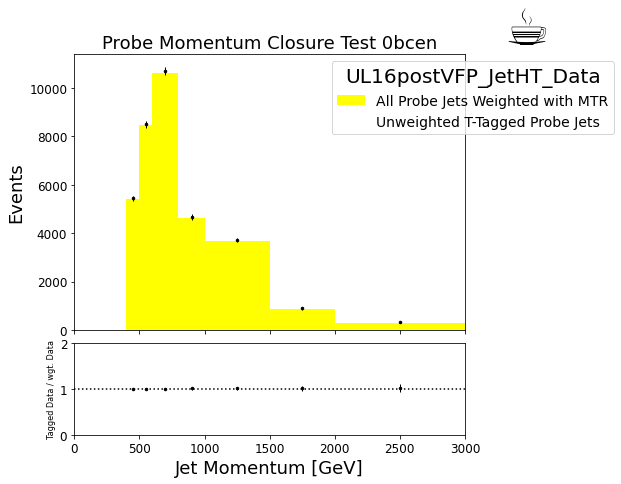

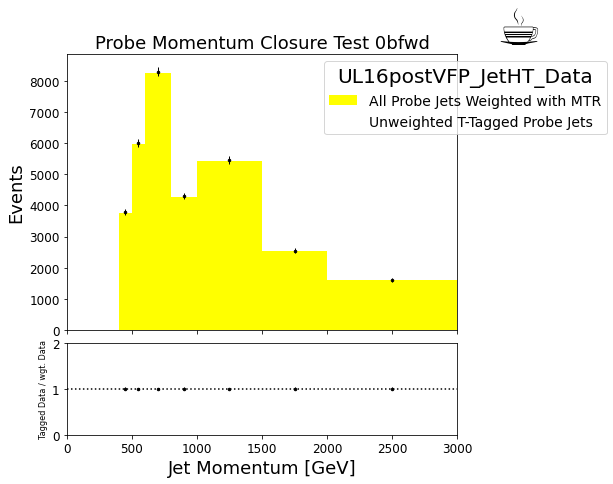

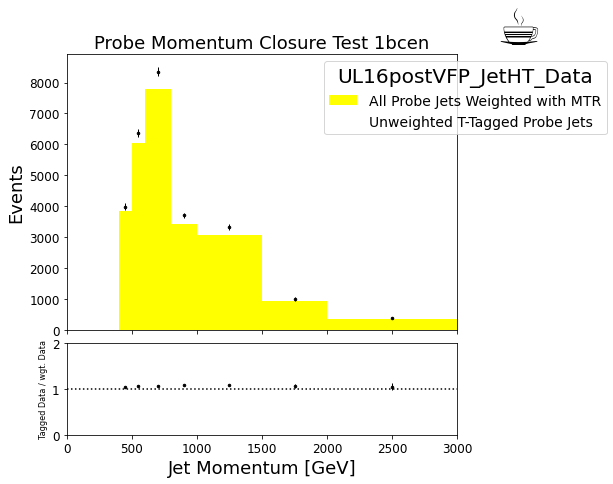

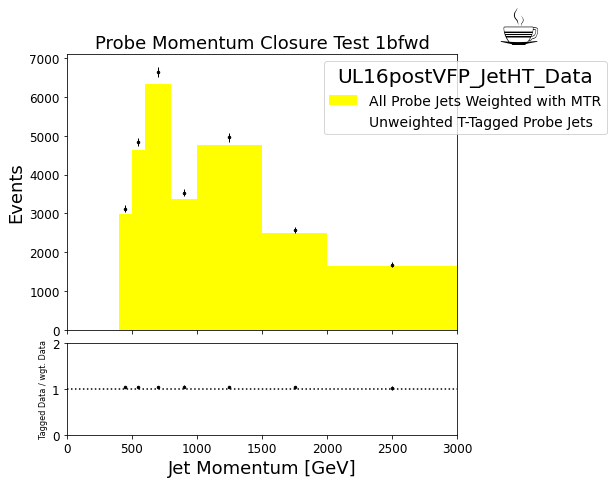

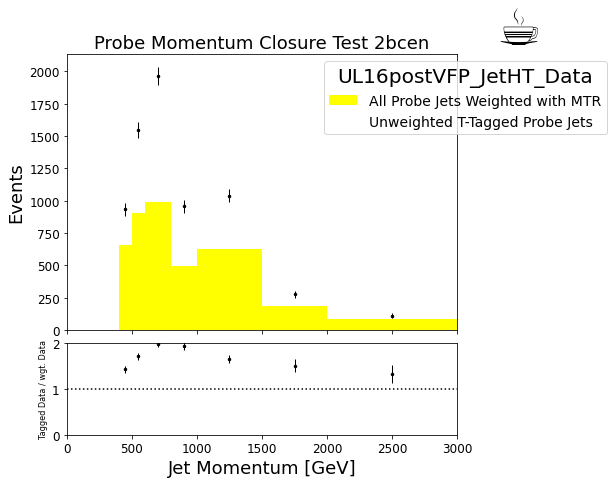

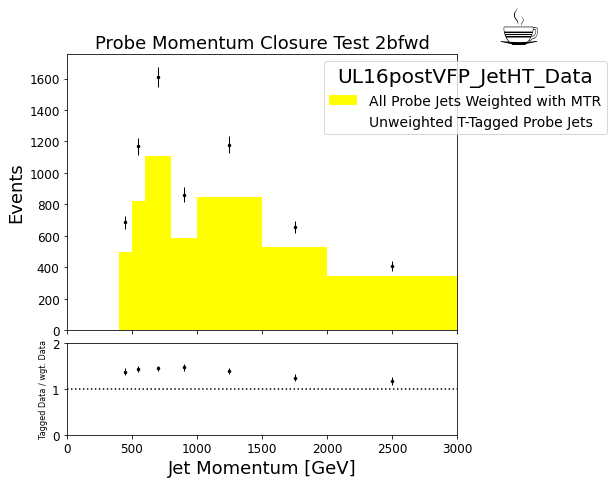

In [20]:
""" ---------- Comparing Background Estimate to unweighted Data ---------- """

SaveDirectory = maindirectory + '/ClosureTests/' + btagDir + yearDir + APVDir
DoesDirectoryExist(SaveDirectory)

for b_y in list_of_bcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(7,7),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.07)
    #b_y = '0bcen' # b-tag category and rapidity window

    legend_labels = {'labels':['', 'All Probe Jets Weighted with MTR', 'T-Tagged Probe Jets'],
                             'loc': 'upper right',
                             'fontsize': 'x-small'}

    #---- Useful Information (Debug Purposes Only)----# 
    lut_file = maindirectory + '/LookupTables/'+btagDir+'mistag_UL16postVFP_JetHT'+Era+'_Data_ttContaminationRemoved_at' + b_y + '.csv'
    df = pd.read_csv(lut_file)
    p_vals = df['p'] # Momentum (GeV)
    mtr = df['M(p)'].values # Mistag Rate
    MMR = mtr.sum()/mtr.size
    print('Mean Mistag Rate (MMR) = ', MMR)

    #---- Check if these two cutflows are the same ----#
    all_evts_unwgt = JetHT2016_unweighted['cutflow']['all events']
    all_evts_wgt = JetHT2016_weighted['cutflow']['all events']
    nevts = JetHT2016_unweighted['cutflow']['at'+b_y] # Anti-tag jet
    bkg_nevts = JetHT2016_weighted['cutflow']['at'+b_y] # (Anti-tag jets) x mtr
    exp_nevts = JetHT2016_unweighted['cutflow']['AT&Pt'+b_y] # Anti-tag and t-tagged Probe pairs
    
    print('All JetHT2016 unweighted events = ', all_evts_unwgt)
    print('All JetHT2016 weighted events = ', all_evts_wgt)
    if all_evts_unwgt != all_evts_wgt:
        printColorText('\n*NOTE* This test is not accurate', 'red')
    print()
    print('Number of Weighted "at" Data; Estimate (Cutflow) =   ', bkg_nevts)
    print('Number of Unweighted "AT&Pt" Data (Cutflow) = ', exp_nevts)
    print()

    #---- Define Histogram categories of interest which should be equal ----# 
    hist_wgt_anacat = 'at' + b_y # category of interest for the weighted data (all weighted probe jets)
    hist_unwgt_at_anacat = hist_wgt_anacat
    hist_unwgt_anacat = 'AT&Pt' + b_y # category of interest for the un-weighted data (unweighted t-tagged probe jets)
    
    #---- Given pairs of jets where one jet is anti-tagged, show the momentum of the probe jets ----#
    hist_unwgt_at = JetHT2016_unweighted['probep'][JetHT2016_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, hist_unwgt_at_anacat), :]
    hist_wgt = JetHT2016_weighted['probep'][JetHT2016_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, hist_wgt_anacat), :]
    hist_unwgt = JetHT2016_unweighted['probep'][JetHT2016_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, hist_unwgt_anacat), :]
    
    # ---- Data Scaling ---- #
    hist_wgt *= Nevts2016_sf_wgt
    hist_unwgt *= Nevts2016_sf
    hist_unwgt_at *= Nevts2016_sf
    
    # all probe jets weighted with mistag rate (including tt contam. subtraction) #
    hist_wgt.plot1d(ax=ax, histtype='fill', color='yellow')
    hist_unwgt.plot1d(ax=ax, histtype='errorbar', marker='.', markersize=5., color='k') # all unweighted, t-tagged probe jets

    d = {'p': p_vals, 'M(p)': mtr, 'unwgt at'+b_y: hist_unwgt_at.view().value, 
         'wgt at'+b_y: hist_wgt.view().value, 
         'unwgt AT&Pt'+b_y: hist_unwgt.view().value}
    df1 = pd.DataFrame(data=d)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df1)

    ax.set_yscale('linear')
    ax.autoscale('y')
    ax.autoscale('x')#, tight=True) # doesn't look like its working...
    ax.set_ylabel('Events')
    ax.set_xlabel(None)
    ax.set_title('Probe Momentum Closure Test ' + b_y)
    legtitle=f'UL16{vfp}_JetHT_Data'
    if Era != '':
        legtitle = f'UL16{vfp}_JetHT_{Era}_Data'
    leg = ax.legend(labels=[r'All Probe Jets Weighted with MTR', r'Unweighted T-Tagged Probe Jets'], 
                    title=legtitle, title_fontsize='x-large', bbox_to_anchor=(1.4, 1.), loc='upper right')

    #---- Plot Ratio ----#
    plotratio(hist_unwgt, hist_wgt, ax = rax, histtype='errorbar', marker='.', markersize=5., color='k')
    rax.set_ylabel('Tagged Data / wgt. Data', fontsize='xx-small')
    rax.axhline(y=1, color='k', linestyle=':')
    rax.set_ylim(0,2)
    rax.set_xlim(0,3000)

    #---- Labeling ----#
    # lumi = plt.text(1.18, 1.07, "2016 Data", #"?? fb$^{-1}$",
    #         fontsize=16,
    #         horizontalalignment='right',
    #         verticalalignment='top',
    #         transform=ax.transAxes
    #        )
    coffea = plt.text(1.10, 1.00, u"☕",
                  fontsize=50,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    filename = 'ClosureTest_Simple_' + name + Unc + TopPt + '_' + b_y + '.png'
    # plt.savefig(SaveDirectory+filename, bbox_inches="tight")
    print('\n' + SaveDirectory + filename)

## Analysis Plots with Data Driven Background Estimate

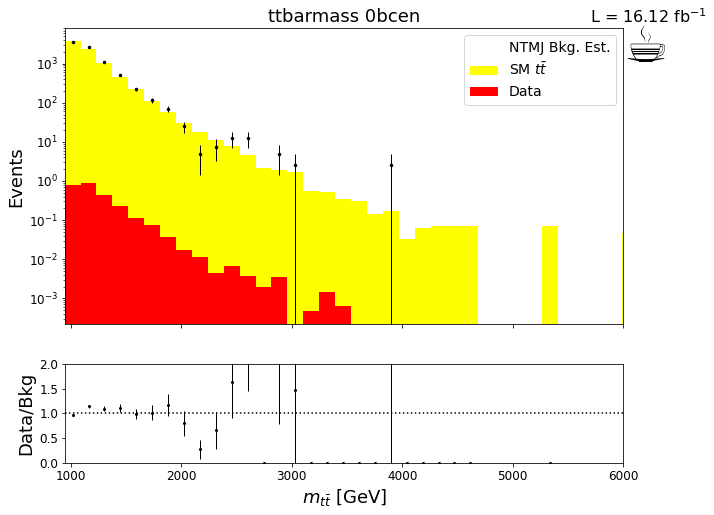

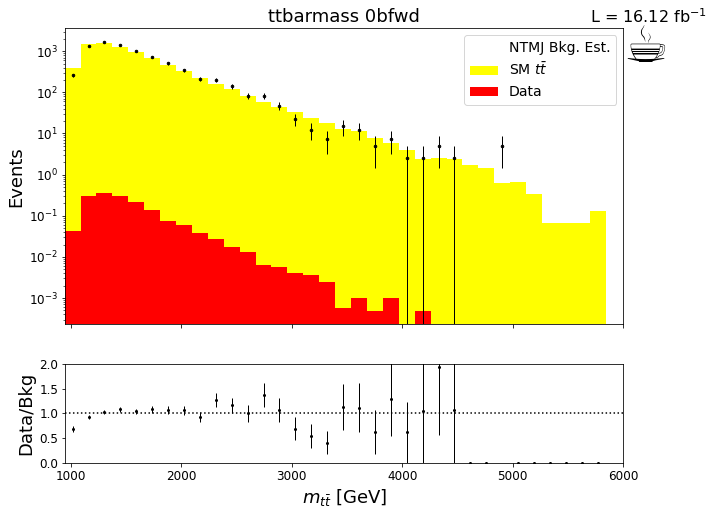

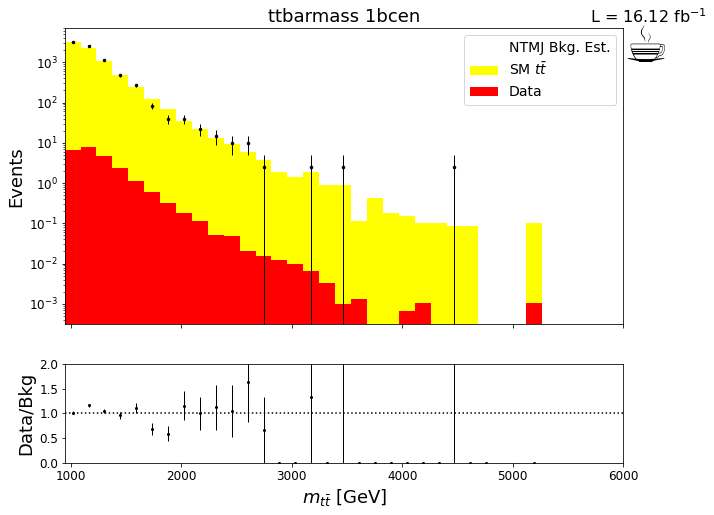

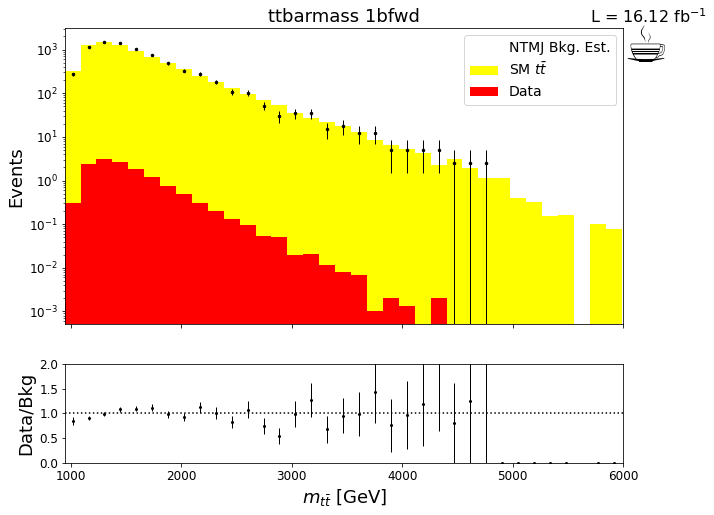

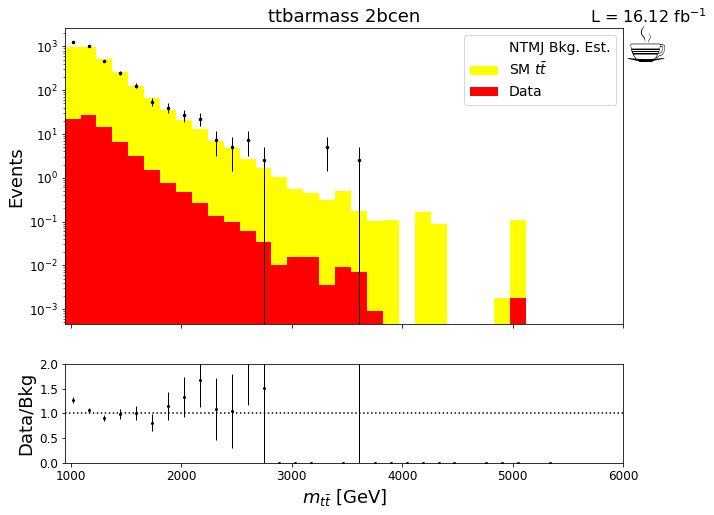

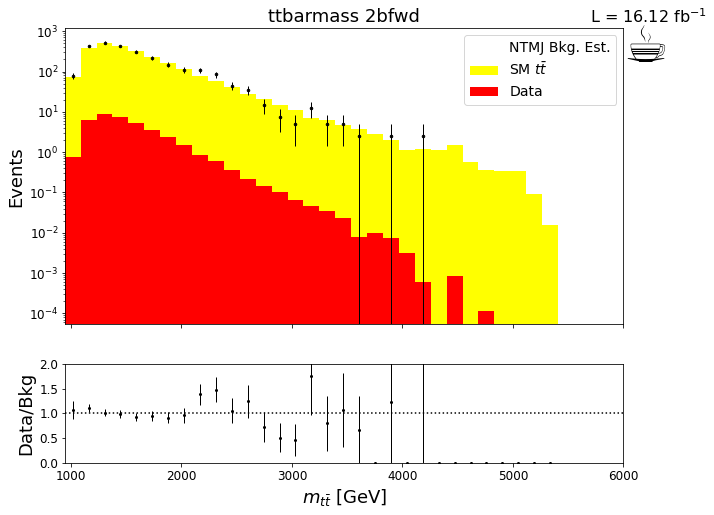

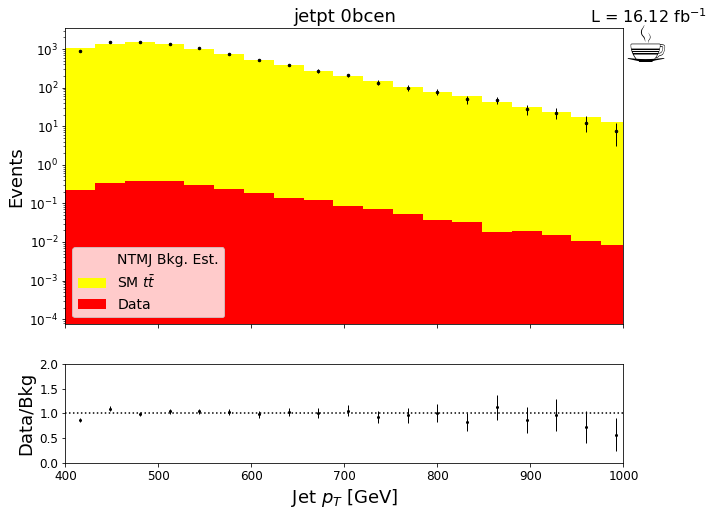

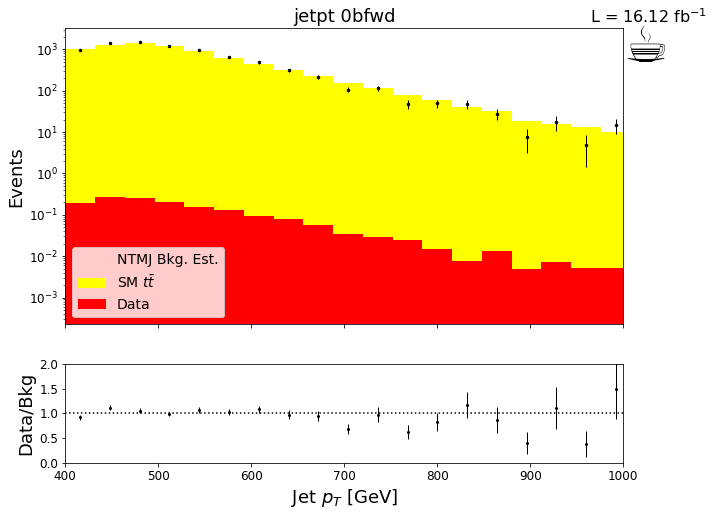

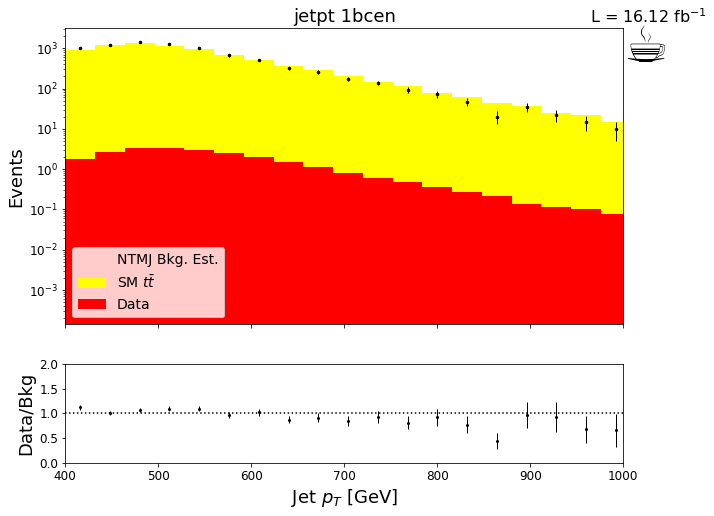

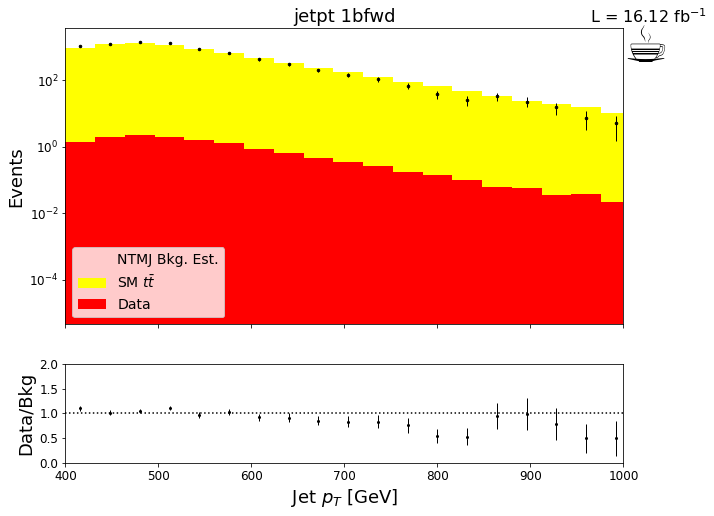

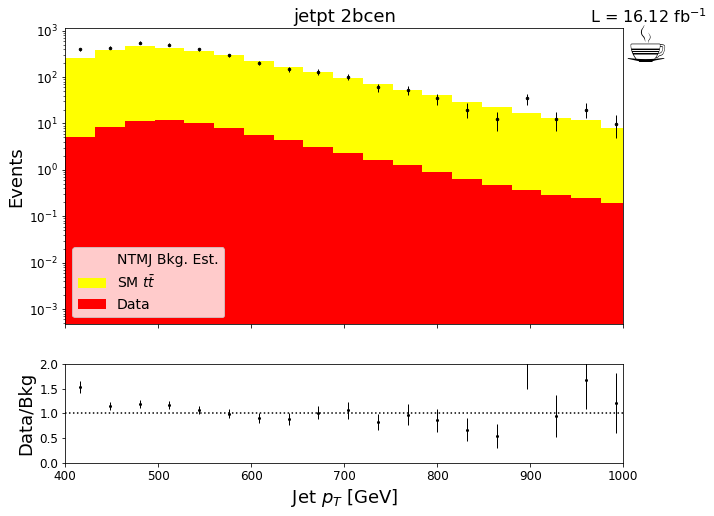

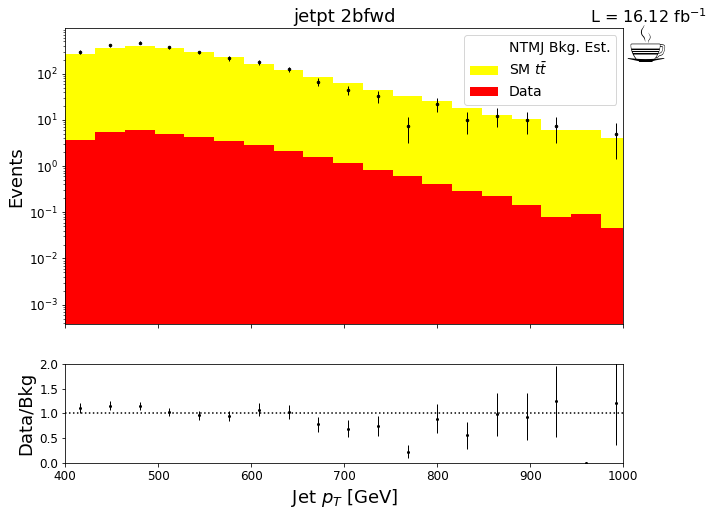

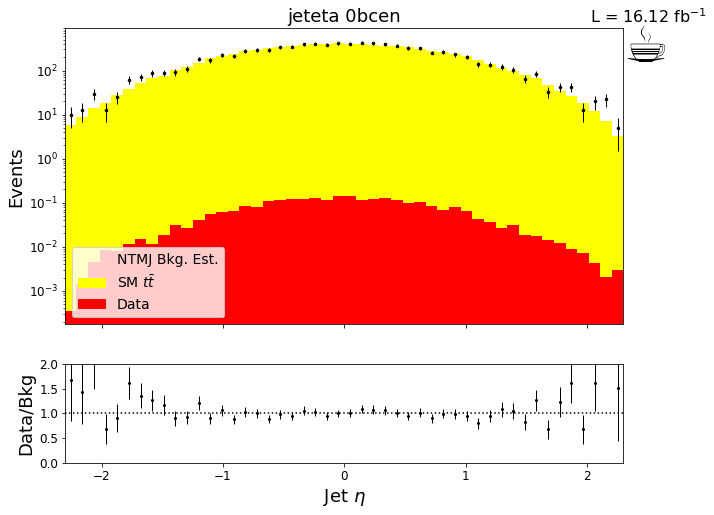

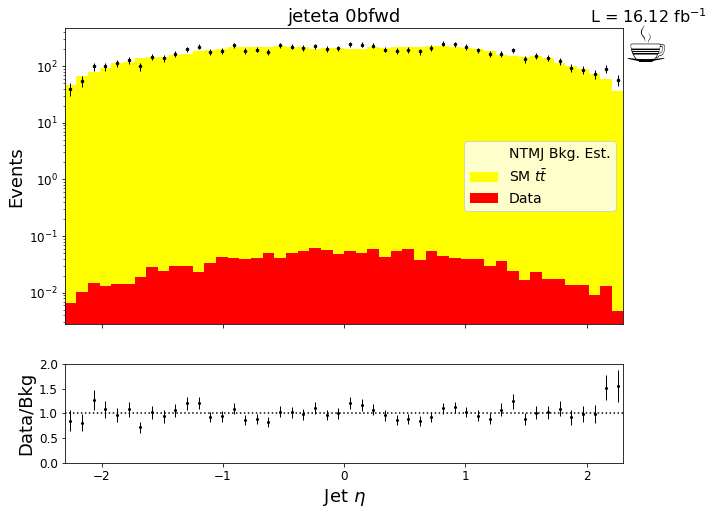

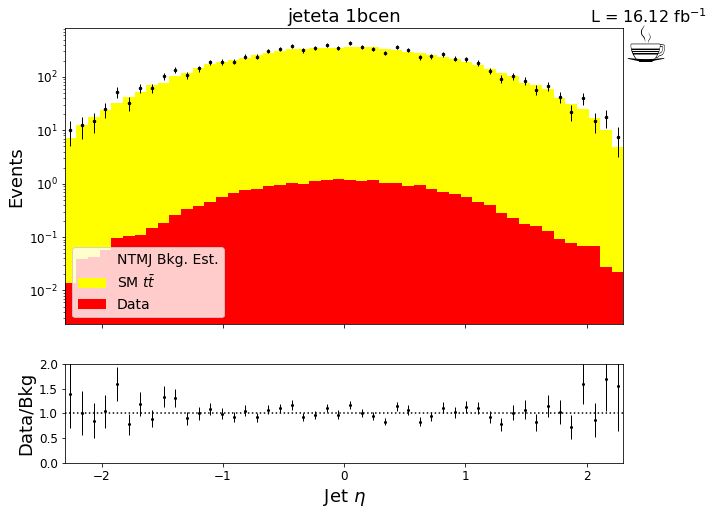

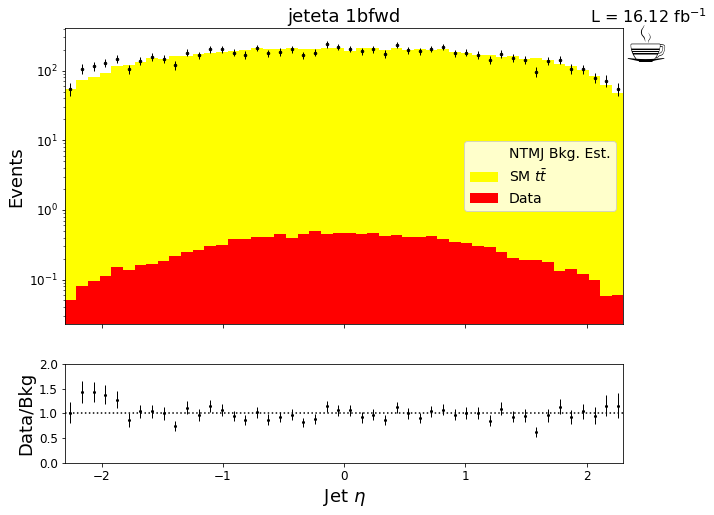

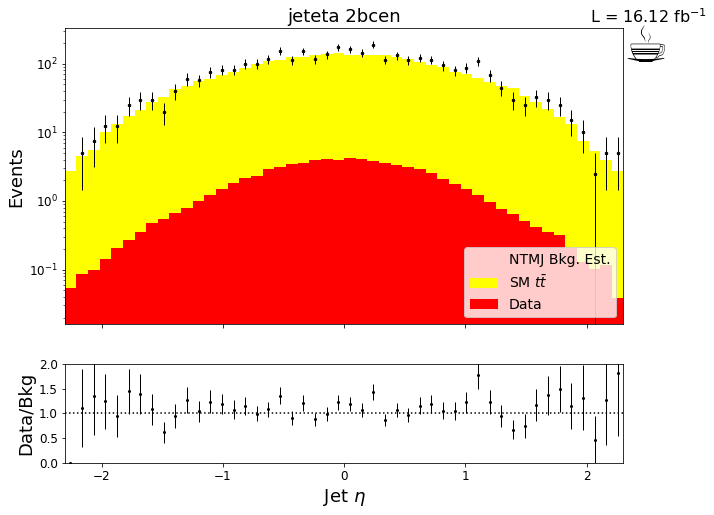

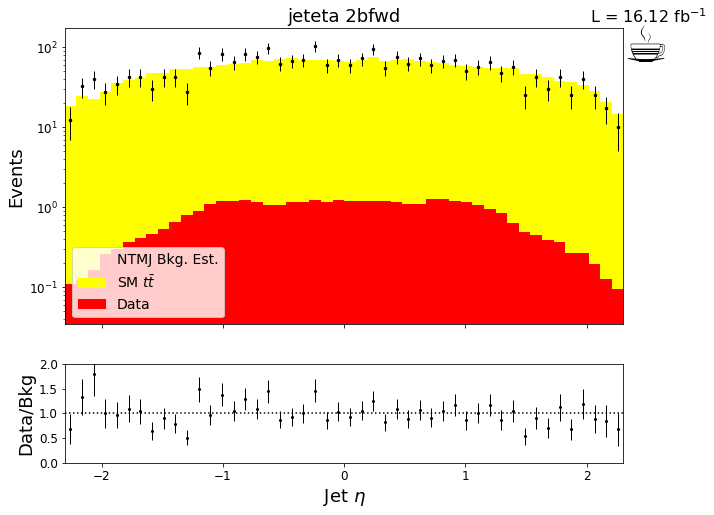

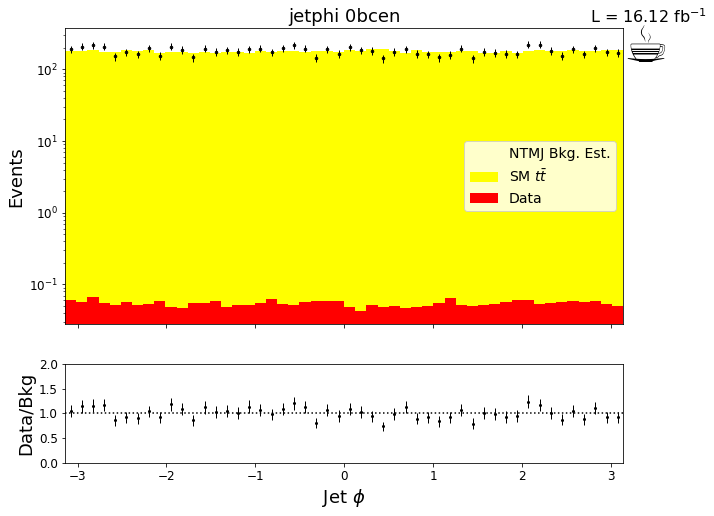

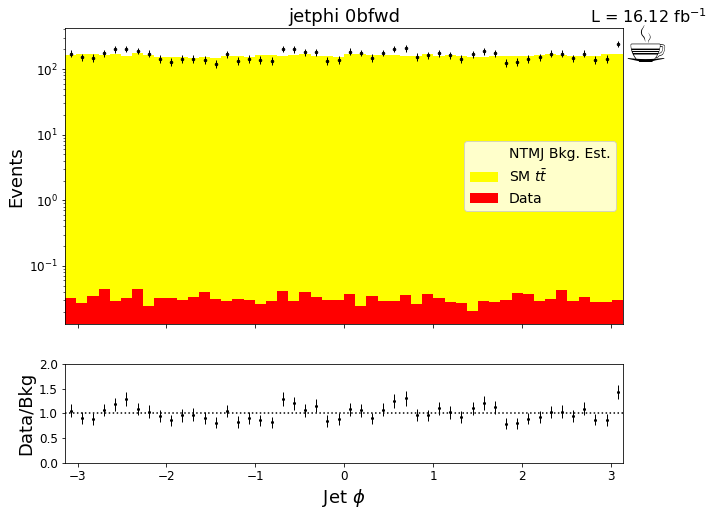

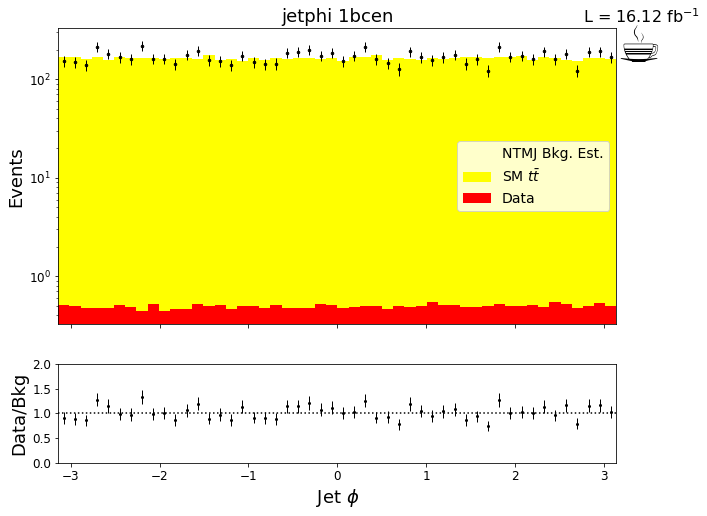

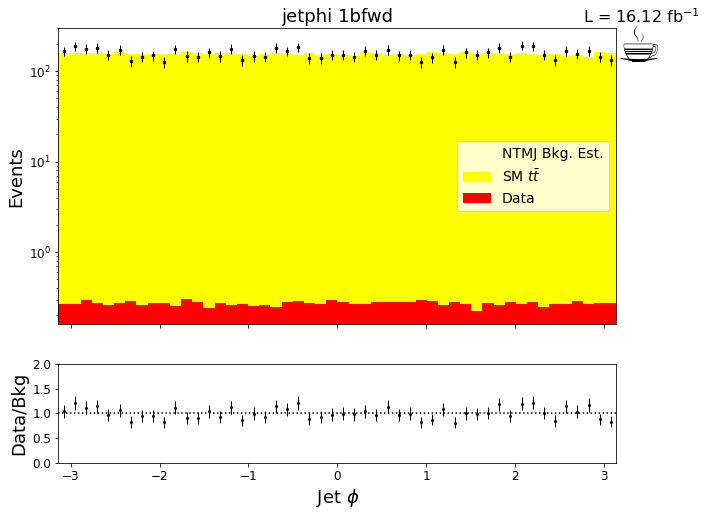

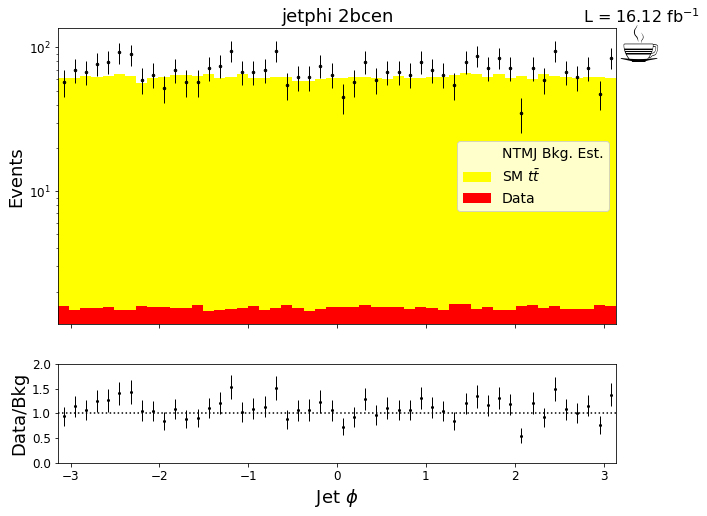

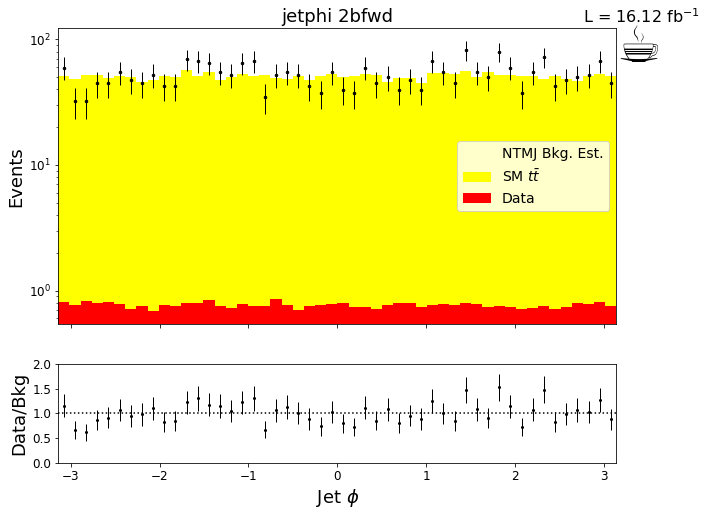

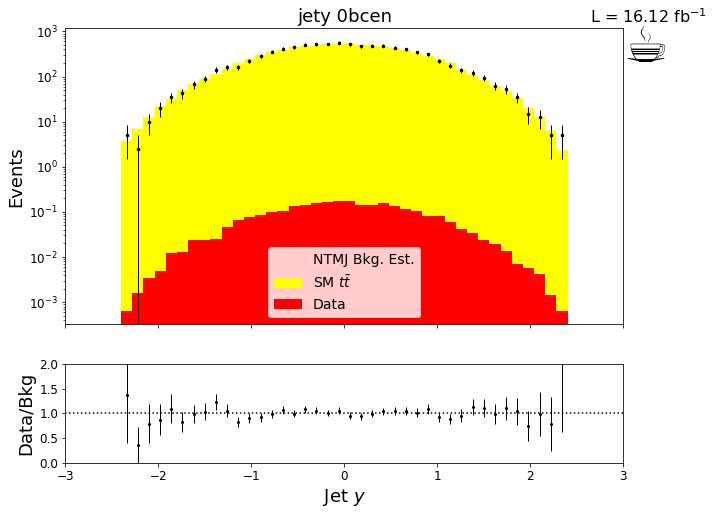

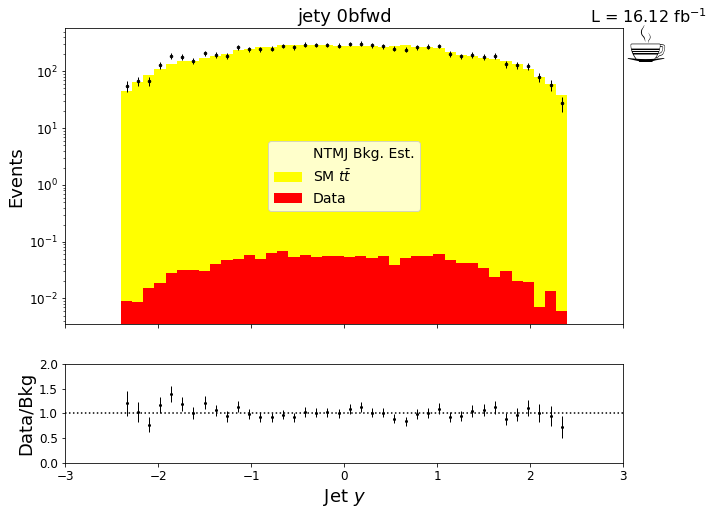

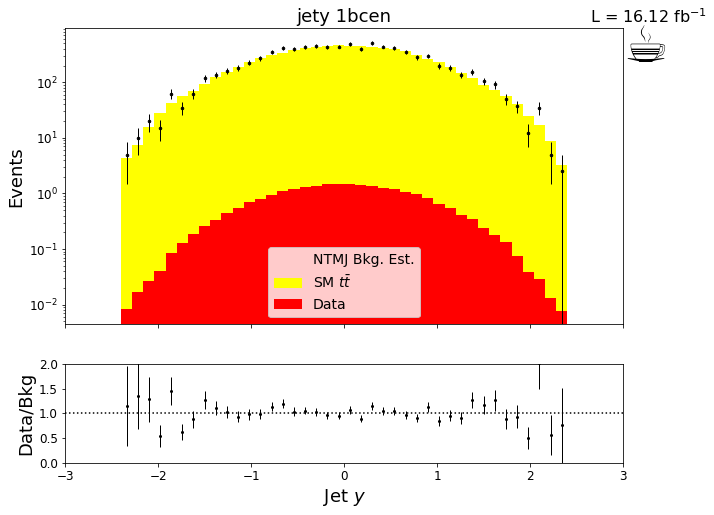

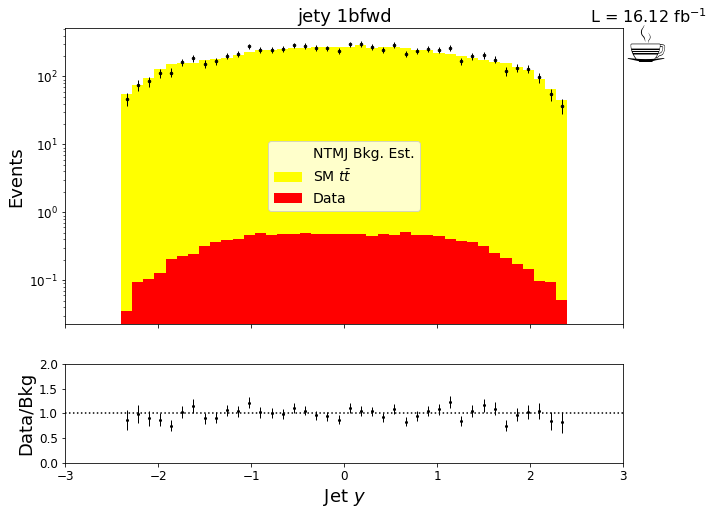

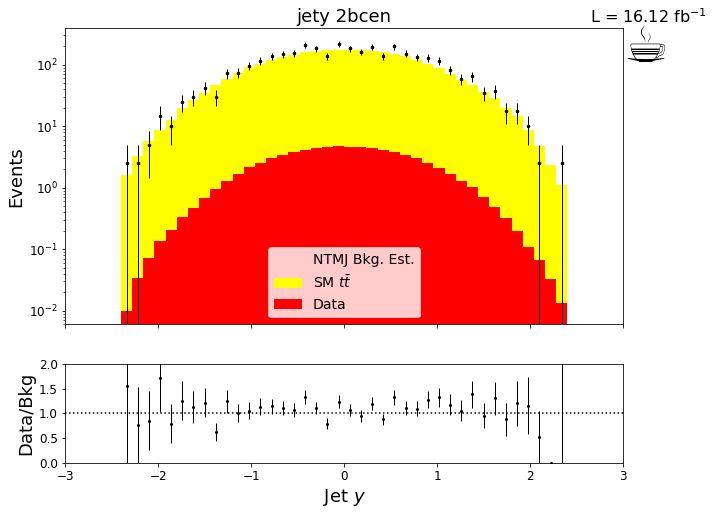

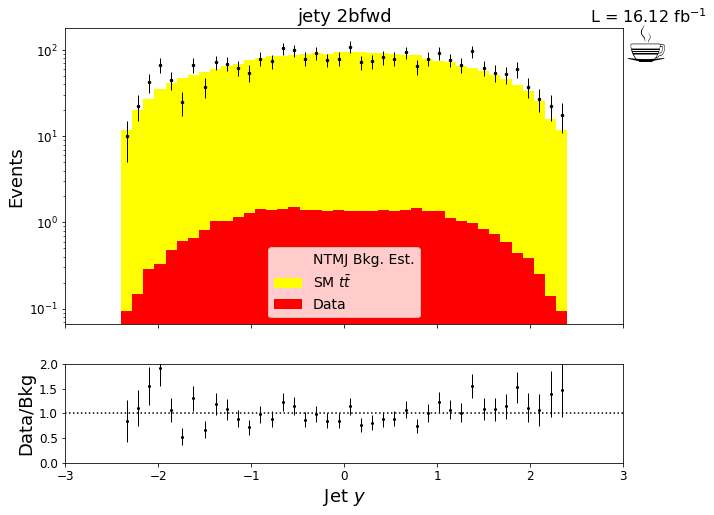

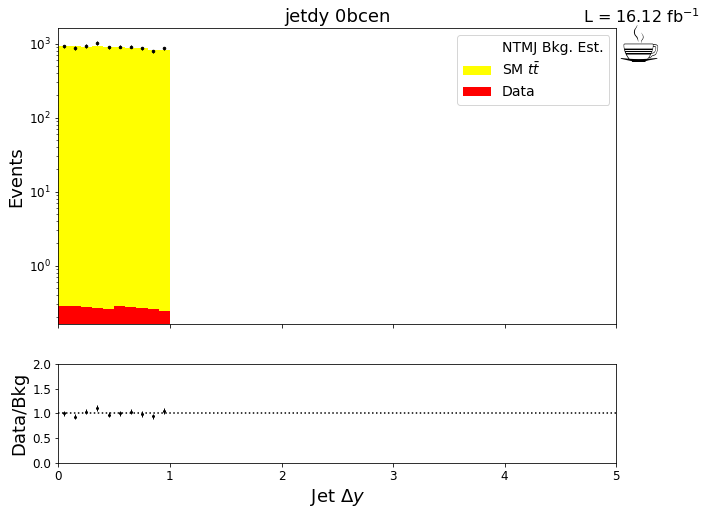

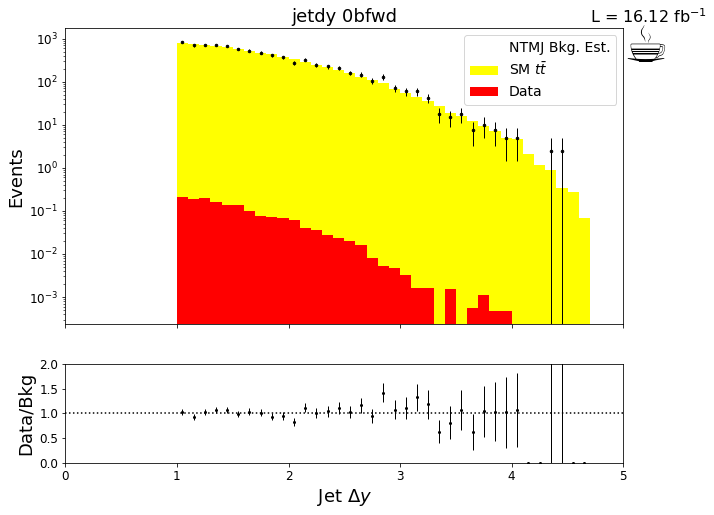

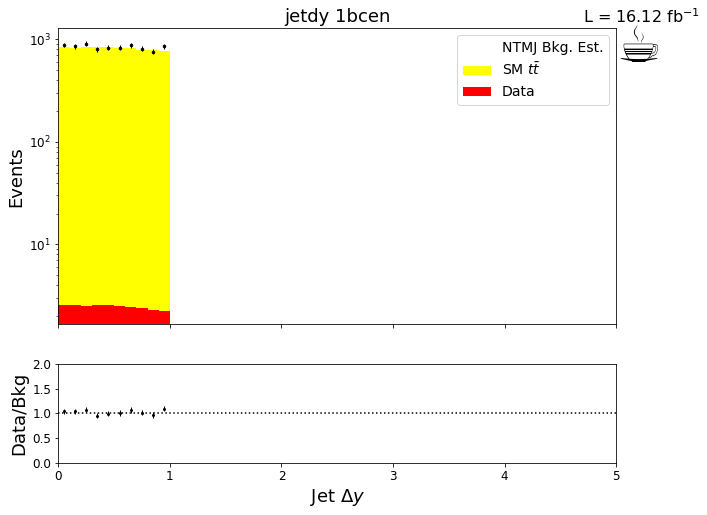

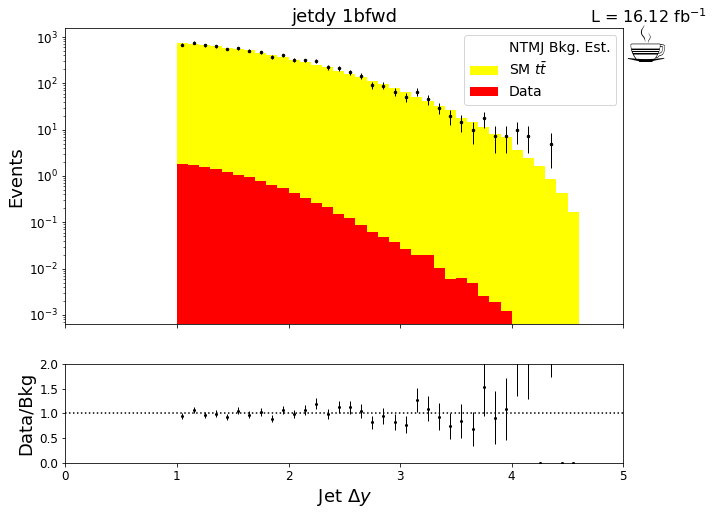

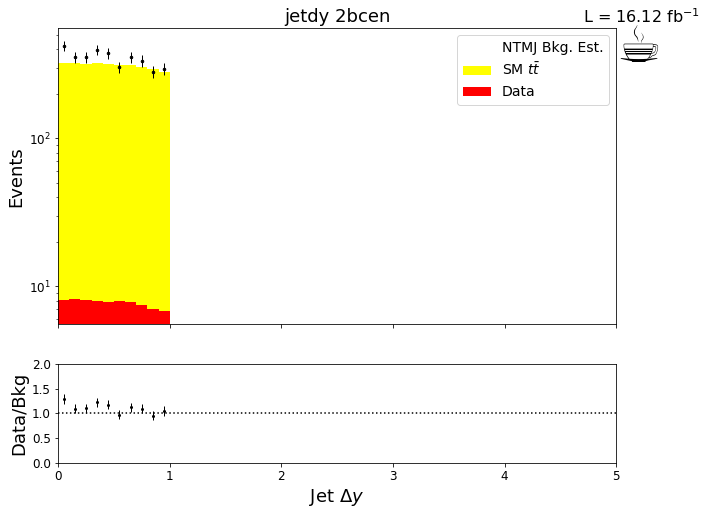

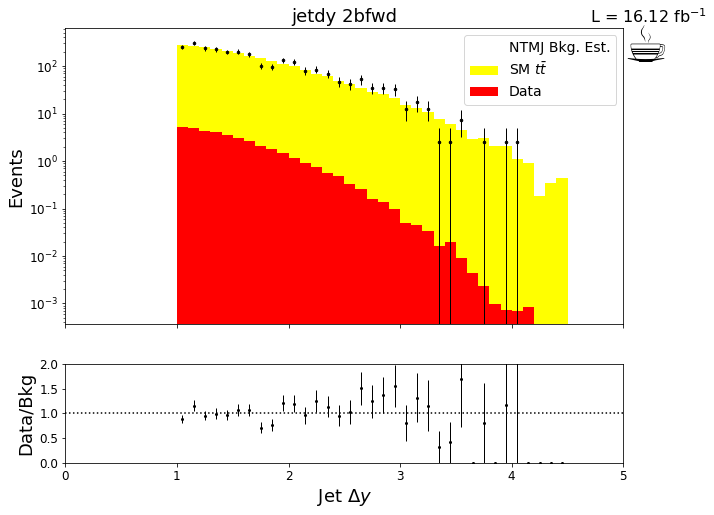

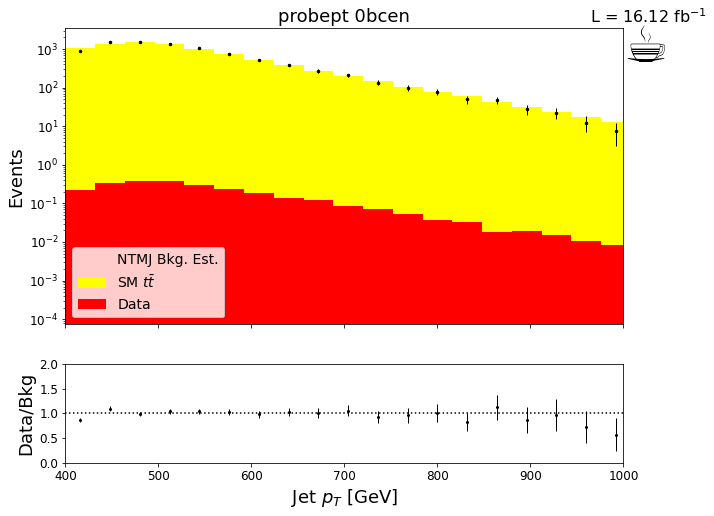

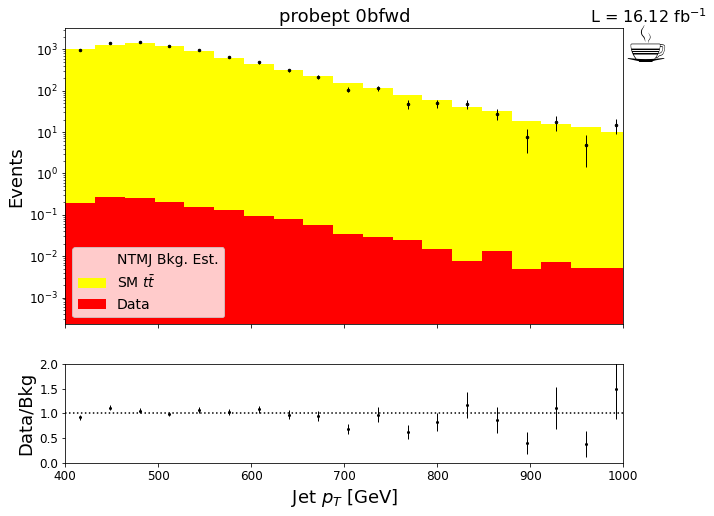

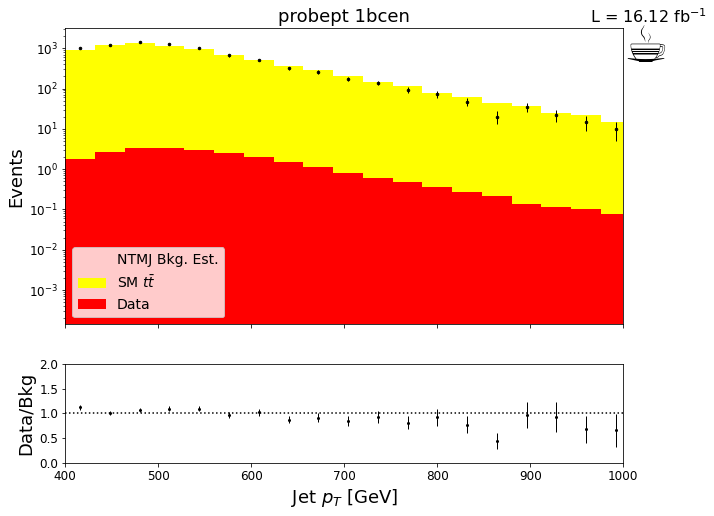

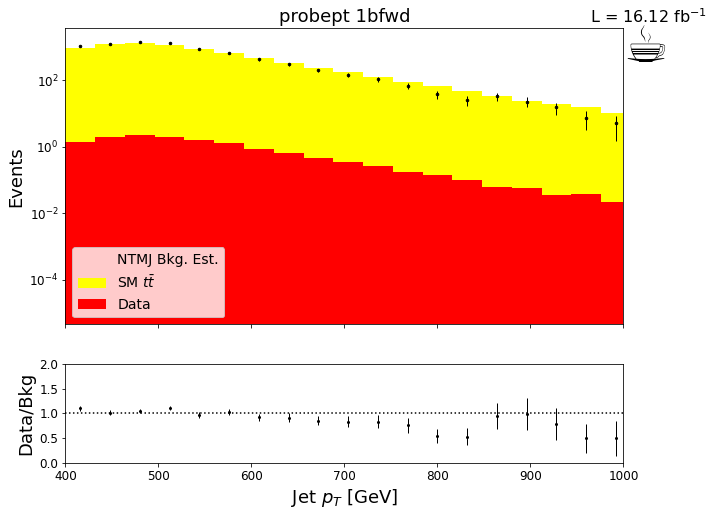

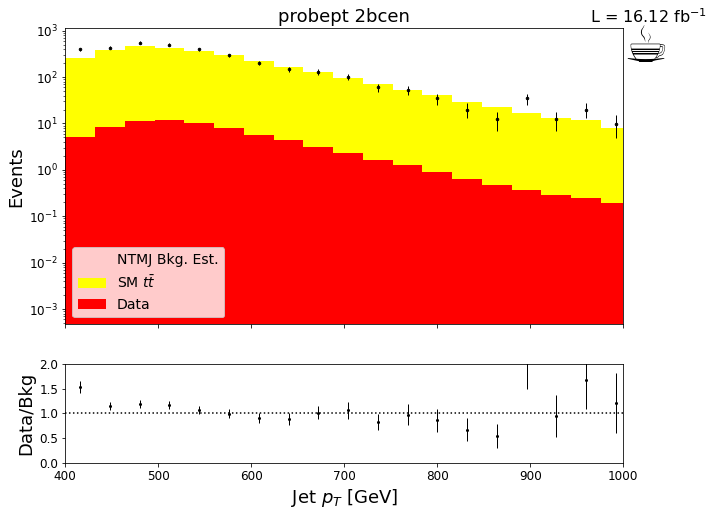

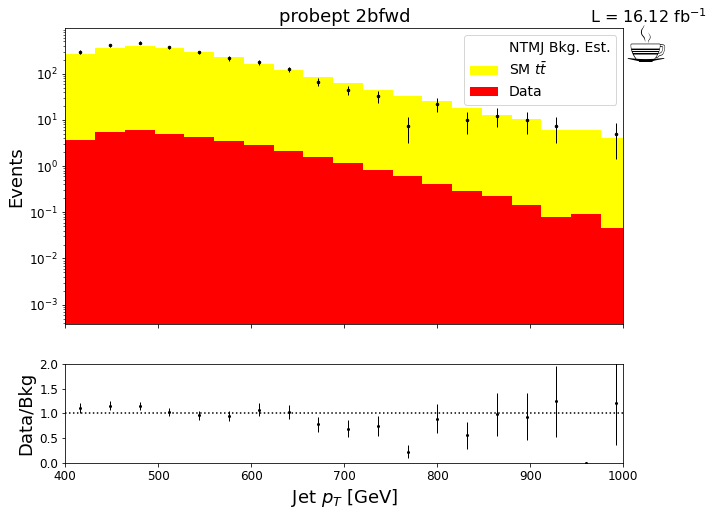

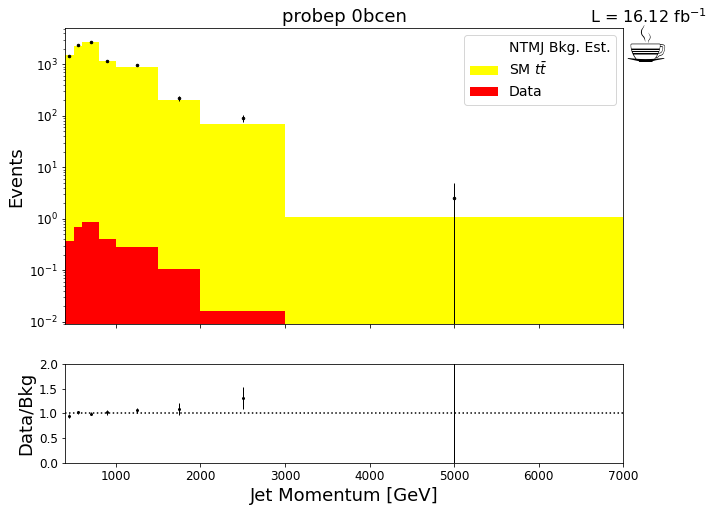

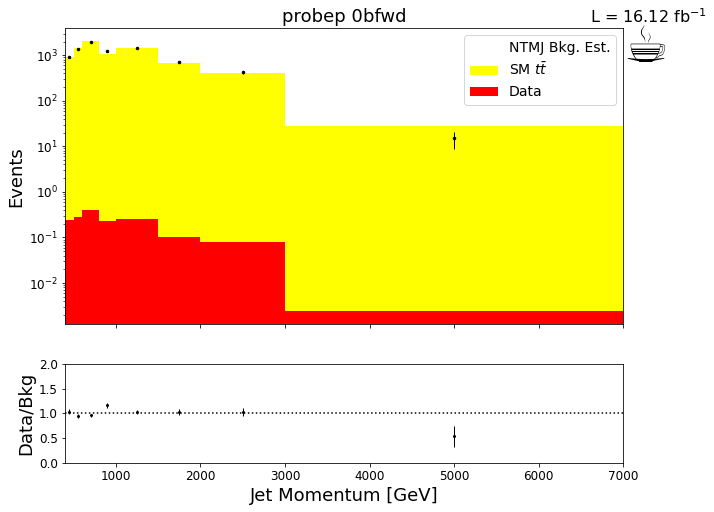

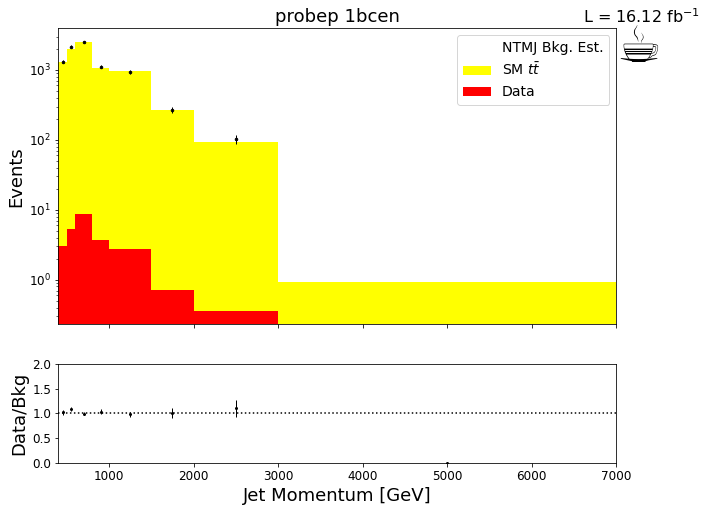

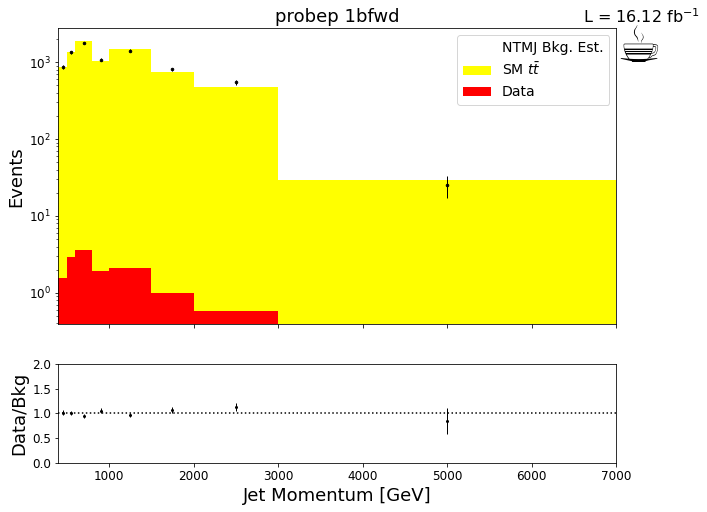

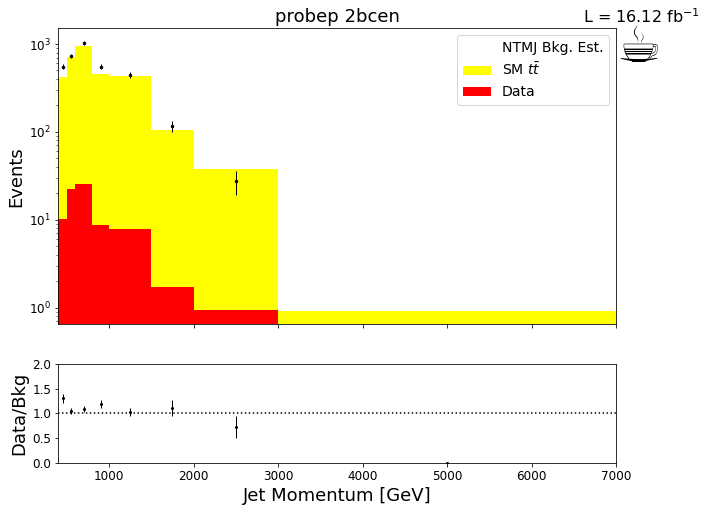

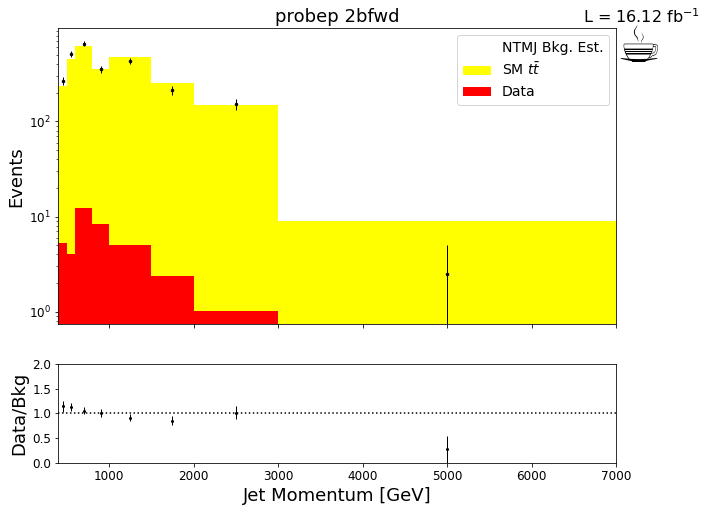

In [21]:
""" ---------- Comparing Background Estimate to Unweighted Data (One Histogram) ---------- """
""" --------------- Background: t tagged probe jet from data weighted by mistag --------------- """
""" --------------- Data: Unweighted Data from the Signal Region (2t tag region) -------------- """

SaveDirectory = maindirectory + '/BkgEstimate/withRSGluonAndDM/' + btagDir + yearDir + APVDir # split histograms into subdirectories
# SaveDirectory_temp = maindirectory + '/BkgEstimate/TemporaryDirectory/withDM/' + btagDir + yearDir + APVDir + UncDir + TopPtDir # split histograms into subdirectories
# SaveDirectoryRootFiles = maindirectory + '/BkgEstimate/RootFiles/' + btagDir + yearDir + APVDir # split histograms into subdirectories
DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
# DoesDirectoryExist(SaveDirectoryRootFiles)

# root_WP   = btagDir[:-1]
# root_year = yearDir[:-1]
# root_APV  =  APVDir[:-1]
# root_Unc  = Unc + TopPt

# try:
#     root_output = uproot3.create(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')
# except OSError:
#     os.remove(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')
#     root_output = uproot3.create(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')

#---- list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep'))----#
for name in list_of_hists:
    for b_y in list_of_bcats:
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
#         fig, ([ax, bx, cx], [rax, rbx, rcx]) = plt.subplots(
#             nrows=2,
#             ncols=3,
#             figsize=(25,10),
#             gridspec_kw={"height_ratios": (4, 1)},
#             sharex=True,
#             sharey='row'
#         )
        
#         fig.subplots_adjust(hspace=.05)
#         fig.subplots_adjust(wspace=.07)

        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(10,8),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True,
        )
        
        #---- Define Histograms from Coffea Outputs ----# 
        # -- For Observed Signal -- #
        Data_hist_unwgt = JetHT2016_unweighted[name][JetHT2016_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]

        # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
        Data_hist_modmass_wgt = JetHT2016_weighted[name][JetHT2016_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]

        # -- SM TTbar MC in Signal Region (Contributes to the Background) -- #
        TTbar_unwgt = TTbar_unweighted[name][TTbar_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]

        # -- Mistag Weighted TTbar MC (To Remove Double Counting of Untracked t-tagged J1 Events in Bkg.Est) -- #
        TTbar_2016_wgt = TTbar_weighted[name][TTbar_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, 'pret'+b_y), :]
        
        # -- Mistag Weighted TTbar MC -- #
        TTbar_2016_wgt_forplot = TTbar_weighted[name][TTbar_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        
        # -- MC RS KK Gluon Signals -- #
        # RSGluon1000_wgt = RSGluon1000_weighted[name][RSGluon1000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon1500_wgt = RSGluon1500_weighted[name][RSGluon1500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon2000_wgt = RSGluon2000_weighted[name][RSGluon2000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon2500_wgt = RSGluon2500_weighted[name][RSGluon2500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon3000_wgt = RSGluon3000_weighted[name][RSGluon3000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon3500_wgt = RSGluon3500_weighted[name][RSGluon3500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon4000_wgt = RSGluon4000_weighted[name][RSGluon4000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon4500_wgt = RSGluon4500_weighted[name][RSGluon4500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # RSGluon5000_wgt = RSGluon5000_weighted[name][RSGluon5000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        
        # -- MC DM Mediator Signals -- #
        # DM1000_wgt = DM1000_weighted[name][DM1000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM1500_wgt = DM1500_weighted[name][DM1500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM2000_wgt = DM2000_weighted[name][DM2000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM2500_wgt = DM2500_weighted[name][DM2500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM3000_wgt = DM3000_weighted[name][DM3000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM3500_wgt = DM3500_weighted[name][DM3500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM4000_wgt = DM4000_weighted[name][DM4000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM4500_wgt = DM4500_weighted[name][DM4500_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]
        # DM5000_wgt = DM5000_weighted[name][DM5000_unwgt_str[12:], ConvertLabelToInt(label_cats_dict, '2t'+b_y), :]

        # =============================================================================================================================== #
        
        # ---- TTbar MC Scaling ---- #
        TTbar_unwgt *= (ttbar2016_sf) # Prepare to include this with background estimate
        TTbar_2016_wgt_forplot *= (ttbar2016_sf_wgt)
        TTbar_2016_wgt *= (-ttbar2016_sf_wgt) # Prepare to subtract this from background to correct for ttbar contamination

        # ---- Data Scaling ---- #
        Data_hist_unwgt *= (Nevts2016_sf) # Observed Signal is only scaled up to Luminosity
        Data_hist_modmass_wgt *= (Nevts2016_sf_wgt)

        Data_hist_modmass_wgt += (TTbar_unwgt) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt += (TTbar_2016_wgt) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        
        # ---- MC Signals Scaling ---- #
#         RSGluon1000_wgt *= (RSGluon1000_2016_sf_wgt)
#         RSGluon1500_wgt *= (RSGluon1500_2016_sf_wgt)
#         RSGluon2000_wgt *= (RSGluon2000_2016_sf_wgt)
#         RSGluon2500_wgt *= (RSGluon2500_2016_sf_wgt)
#         RSGluon3000_wgt *= (RSGluon3000_2016_sf_wgt)
#         RSGluon3500_wgt *= (RSGluon3500_2016_sf_wgt)
#         RSGluon4000_wgt *= (RSGluon4000_2016_sf_wgt)
#         RSGluon4500_wgt *= (RSGluon4500_2016_sf_wgt)
#         RSGluon5000_wgt *= (RSGluon5000_2016_sf_wgt)
        
#         DM1000_wgt *= (DM1000_2016_sf_wgt)
#         DM1500_wgt *= (DM1500_2016_sf_wgt)
#         DM2000_wgt *= (DM2000_2016_sf_wgt)
#         DM2500_wgt *= (DM2500_2016_sf_wgt)
#         DM3000_wgt *= (DM3000_2016_sf_wgt)
#         DM3500_wgt *= (DM3500_2016_sf_wgt)
#         DM4000_wgt *= (DM4000_2016_sf_wgt)
#         DM4500_wgt *= (DM4500_2016_sf_wgt)
#         DM5000_wgt *= (DM5000_2016_sf_wgt)

        # =============================================================================================================================== #

        # ---- Background and Observed Signal for Histograms Compared with MC Signals ---- #

        # -- J0 t-tagged and weighted, J1 Mass Modified, SM ttbar included, J1 t-tagged double counts removed -- #
        Background_ModMass_Corrected = Data_hist_modmass_wgt 

        # -- Simple Observed Data in Signal Region -- #
        Observed = Data_hist_unwgt 
        
        
        # # ---- Shrink current axis by 10% ---- 3
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])

        # ---- Plot Histograms (Comment out whatever you don't want included in the figure and/or root file) ---- #
        ObservedPlot1 = Observed.plot1d(ax=ax, histtype='errorbar', marker='.', markersize=5., color='k')
        BackgroundPlot1 = Background_ModMass_Corrected.plot1d(ax=ax, histtype='fill', color='yellow')
        TTbarPlot = TTbar_2016_wgt_forplot.plot1d(ax=ax, histtype='fill', color='r')
        
        # ObservedPlot2 = Observed.plot1d(ax=bx, histtype='errorbar', marker='.', markersize=5., color='k')
        # BackgroundPlot2 = Background_ModMass_Corrected.plot1d(ax=bx, histtype='fill', color='yellow')
        # RSGluon1000Plot = RSGluon1000_wgt.plot1d(ax=bx, histtype='step', color='cornflowerblue')
        # RSGluon1500Plot = RSGluon1500_wgt.plot1d(ax=bx, histtype='step', color='royalblue')
        # RSGluon2000Plot = RSGluon2000_wgt.plot1d(ax=bx, histtype='step', color='blue')
        # RSGluon2500Plot = RSGluon2500_wgt.plot1d(ax=bx, histtype='step', color='mediumslateblue')
        # RSGluon3000Plot = RSGluon3000_wgt.plot1d(ax=bx, histtype='step', color='mediumpurple')
        # RSGluon3500Plot = RSGluon3500_wgt.plot1d(ax=bx, histtype='step', color='blueviolet')
        # RSGluon4000Plot = RSGluon4000_wgt.plot1d(ax=bx, histtype='step', color='violet')
        # RSGluon4500Plot = RSGluon4500_wgt.plot1d(ax=bx, histtype='step', color='fuchsia')
        # RSGluon5000Plot = RSGluon5000_wgt.plot1d(ax=bx, histtype='step', color='deeppink')
        
        # ObservedPlot3 = Observed.plot1d(ax=cx, histtype='errorbar', marker='.', markersize=5., color='k')
        # BackgroundPlot3 = Background_ModMass_Corrected.plot1d(ax=cx, histtype='fill', color='yellow')
        # DM1000Plot = DM1000_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='cornflowerblue')
        # DM1500Plot = DM1500_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='royalblue')
        # DM2000Plot = DM2000_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='blue')
        # DM2500Plot = DM2500_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='mediumslateblue')
        # DM3000Plot = DM3000_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='mediumpurple')
        # DM3500Plot = DM3500_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='blueviolet')
        # DM4000Plot = DM4000_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='violet')
        # DM4500Plot = DM4500_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='fuchsia')
        # DM5000Plot = DM5000_wgt.plot1d(ax=cx, histtype='step', linestyle='--', color='deeppink')
        
        
        # root_output['Data_' + b_y + '_' + name] = hist.export1d(Observed)
        # root_output['BkgEst_' + b_y + '_' + name] = hist.export1d(Background_ModMass_Corrected)
        # root_output['TTbar_' + b_y + '_' + name] = hist.export1d(TTbar_unwgt)
        # root_output['RSGluon1000_' + b_y + '_' + name] = hist.export1d(RSGluon1000_wgt)
        # root_output['RSGluon1500_' + b_y + '_' + name] = hist.export1d(RSGluon1500_wgt)
        # root_output['RSGluon2000_' + b_y + '_' + name] = hist.export1d(RSGluon2000_wgt)
        # root_output['RSGluon2500_' + b_y + '_' + name] = hist.export1d(RSGluon2500_wgt)
        # root_output['RSGluon3000_' + b_y + '_' + name] = hist.export1d(RSGluon3000_wgt)
        # root_output['RSGluon3500_' + b_y + '_' + name] = hist.export1d(RSGluon3500_wgt)
        # root_output['RSGluon4000_' + b_y + '_' + name] = hist.export1d(RSGluon4000_wgt)
        # root_output['RSGluon4500_' + b_y + '_' + name] = hist.export1d(RSGluon4500_wgt)
        # root_output['RSGluon5000_' + b_y + '_' + name] = hist.export1d(RSGluon5000_wgt)
        # root_output['DM1000_' + b_y + '_' + name] = hist.export1d(DM1000_wgt)
        # root_output['DM1500_' + b_y + '_' + name] = hist.export1d(DM1500_wgt)
        # root_output['DM2000_' + b_y + '_' + name] = hist.export1d(DM2000_wgt)
        # root_output['DM2500_' + b_y + '_' + name] = hist.export1d(DM2500_wgt)
        # root_output['DM3000_' + b_y + '_' + name] = hist.export1d(DM3000_wgt)
        # root_output['DM3500_' + b_y + '_' + name] = hist.export1d(DM3500_wgt)
        # root_output['DM4000_' + b_y + '_' + name] = hist.export1d(DM4000_wgt)
        # root_output['DM4500_' + b_y + '_' + name] = hist.export1d(DM4500_wgt)
        # root_output['DM5000_' + b_y + '_' + name] = hist.export1d(DM5000_wgt)


        # plt.ylim(bottom = .1, top = 10**4)

        ax.set_yscale('log')
        ax.set_ylim(.1, 10**4)
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        # bx.set_xlabel(None)
        # cx.set_xlabel(None)
        ax.set_title(name + ' ' + b_y)

        #---- Plot Ratio ----#
        plotratio(Observed, Background_ModMass_Corrected, ax = rax, histtype='errorbar', marker='.', markersize=4., color='k')
        # plotratio(Observed, Background_ModMass_Corrected, ax = rbx, histtype='errorbar', marker='.', markersize=4., color='k')
        # plotratio(Observed, Background_ModMass_Corrected, ax = rcx, histtype='errorbar', marker='.', markersize=4., color='k')
        
        l1 = [r'NTMJ Bkg. Est.', r'SM $t\bar{t}$', r'Data']
        l2 = [r'NTMJ Bkg. Est.', r'$1.0\ TeV$', r'$1.5\ TeV$', r'$2.0\ TeV$', r'$2.5\ TeV$', 
              r'$3.0\ TeV$', r'$3.5\ TeV$', r'$4.0\ TeV$', r'$4.5\ TeV$', r'$5.0\ TeV$', r'Data']
        # l3 = [r'NTMJ Bkg. Est.', r'DM Med. $1.0\ TeV$', r'Data']
        if Era != '':
            legtitle1 = ax.legend(title=f'Era {Era}', labels=l1, fontsize='small', title_fontsize='x-large')
        else:
            legtitle1 = ax.legend(labels=l1, fontsize='medium')
        # legtitle2 = bx.legend(title='RS GG:', title_fontsize='medium', labels=l2, fontsize='xx-small')
        # legtitle3 = cx.legend(title='DM Med.:', title_fontsize='medium', labels=l2, fontsize='xx-small')
        # legtitle = ax.legend(title='Datasets:', title_fontsize='x-large', labels=ll, fontsize='medium')
        
        rax.set_ylabel('Data/Bkg')
        rax.axhline(y=1, color='k', linestyle=':')
        # rbx.axhline(y=1, color='k', linestyle=':')
        # rcx.axhline(y=1, color='k', linestyle=':')
        rax.set_ylim(0,2)
        if 'ttbarmass' in name:
            rax.set_xlim(950,6000)
        elif 'jetpt' in name:
            rax.set_xlim(400,1000)
        elif 'jeteta' in name:
            rax.set_xlim(-2.3,2.3)
        elif 'jetphi' in name:
            rax.set_xlim(-3.14, 3.14)
        elif 'jety' in name:
            rax.set_xlim(-3., 3.)
        elif 'jetdy' in name:
            rax.set_xlim(0., 5.)
        elif 'probept' in name:
            rax.set_xlim(400., 1000.)   
        elif 'probep' in name:
            rax.set_xlim(400., 7000.)  
        
        #rax.set_xlim(0,500)

        #---- Labeling ----#
        Lint = str(LumToUse*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, "L = " + Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
        coffea = plt.text(1.00, 0.85, u"☕",
                  fontsize=50,
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )

        filename = 'BkgEst_' + name + '_ContaminationCorrection_ModMass' + Unc + TopPt + '_' + b_y + '.png'
        filename_temp = 'BkgEst_' + name + '_ContaminationCorrection_ModMass' + Unc + TopPt + '_' + b_y + '.png'
        plt.savefig(SaveDirectory+filename_temp, bbox_inches="tight")
        # print('\n' + SaveDirectory + filename)
# root_output.close()